<a href="https://colab.research.google.com/github/hannbi/2025ML-CV/blob/main/CV_HW2_hanbi_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AlexNet을 cifar10에 적용할 떄 과적합을 개선하여 성능 향상하는 방법 실습

AlexNet
- CNN을 본격적으로 대중화 시킨 모델
- 입력: 227 X 227 X 3
- 5 convolutional layers, 3 FC layers, 출력층 100개 클래스 softmax
- Relu, Dropout 사용

### AlexNet구조를 cifar에 적용하여 과적합을 확인하고 이를 다양한 방법으로 개선하여 성능향상하기 및 비교분석

##### 1. 기본모델: Alex구조를 CIFAR-10 데이터셋에 맞게 input_shape, filter, stride등을 조정한 기본 모델 -> fit 후 과적합 문제 확인

##### 2. 개선모델: 성능향상을 위한 다양한 기법을 적용한 모델 ex) Dropout, BatchNormalization, 레이어 수 조절 등

-> 두 모델의 성능을 시각화를 통해 비교분석

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드 및 전처리(정규화 및 인코딩)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# 기본모델 구현 함수
def build_alexnet_basic():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3), padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(layers.Conv2D(192, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(layers.Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# 개선모델 구현 함수
def build_alexnet_improved():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(layers.Conv2D(192, (3,3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(layers.Conv2D(384, (3,3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# 두 모델(model_basic, model_improved) 훈련 (각 20 에폭 사용)
model_basic = build_alexnet_basic()
history_basic = model_basic.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                                epochs=20, batch_size=128, verbose=2)

model_improved = build_alexnet_improved()
history_improved = model_improved.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                                      epochs=20, batch_size=128, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


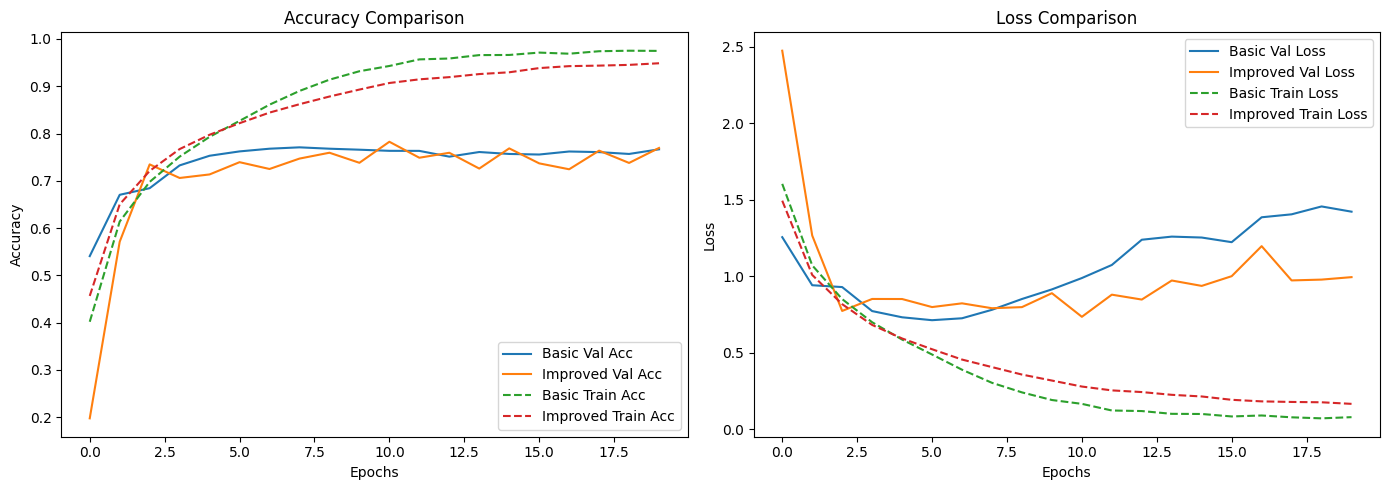

In [ ]:
# 두 모델 accuracy, loss 비교
def plot_history(hist1, hist2, label1='Basic', label2='Improved'):
    plt.figure(figsize=(14,5))

    # 정확도
    plt.subplot(1,2,1)
    plt.plot(hist1.history['val_accuracy'], label=f'{label1} Val Acc')
    plt.plot(hist2.history['val_accuracy'], label=f'{label2} Val Acc')
    plt.plot(hist1.history['accuracy'], linestyle='--', label=f'{label1} Train Acc')
    plt.plot(hist2.history['accuracy'], linestyle='--', label=f'{label2} Train Acc')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # 손실
    plt.subplot(1,2,2)
    plt.plot(hist1.history['val_loss'], label=f'{label1} Val Loss')
    plt.plot(hist2.history['val_loss'], label=f'{label2} Val Loss')
    plt.plot(hist1.history['loss'], linestyle='--', label=f'{label1} Train Loss')
    plt.plot(hist2.history['loss'], linestyle='--', label=f'{label2} Train Loss')
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_basic, history_improved)

In [ ]:
score_basic = model_basic.evaluate(X_test, y_test_cat, verbose=0)
score_improved = model_improved.evaluate(X_test, y_test_cat, verbose=0)

print(f"Basic Model Accuracy:    {score_basic[1]*100:.2f}%")
print(f"Improved Model Accuracy: {score_improved[1]*100:.2f}%")

Basic Model Accuracy:    76.66%
Improved Model Accuracy: 76.95%
